In [1]:
import sys
import pandas as pd
import pickle

#make zaCode visible from this notebook
if '..' not in sys.path:
    sys.path.insert(0, '..')
    
from zaCode import DatasetManipulator
from zaCode import ClassifierTrainer
from zaCode import Validator

In [10]:
data = pd.read_csv('../data/orders_train.txt', ';')

In [11]:
data

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity
0,a1000001,2014-01-01,i1000382,1972,44,3.0,1,10.00,29.99,0,0.0,c1010575,2,BPRG,0
1,a1000001,2014-01-01,i1000550,3854,44,3.0,1,20.00,39.99,0,0.0,c1010575,2,BPRG,0
2,a1000002,2014-01-01,i1001991,2974,38,8.0,1,35.00,49.99,0,0.0,c1045905,4,BPRG,0
3,a1000002,2014-01-01,i1001999,1992,38,8.0,1,49.99,49.99,0,0.0,c1045905,4,BPRG,1
4,a1000003,2014-01-01,i1001942,1968,42,8.0,1,10.00,35.99,0,0.0,c1089295,2,PAYPALVC,0
5,a1000003,2014-01-01,i1001942,1972,42,8.0,1,10.00,35.99,0,0.0,c1089295,2,PAYPALVC,0
6,a1000003,2014-01-01,i1001974,1001,42,8.0,1,25.00,39.99,0,0.0,c1089295,2,PAYPALVC,0
7,a1000003,2014-01-01,i1001976,3976,44,8.0,1,15.00,39.99,0,0.0,c1089295,2,PAYPALVC,0
8,a1000003,2014-01-01,i1002392,2493,42,13.0,0,0.00,59.99,0,0.0,c1089295,2,PAYPALVC,0
9,a1000004,2014-01-01,i1002457,1001,42,14.0,1,89.99,89.99,0,0.0,c1050116,3,BPRG,1


In [12]:
from collections import defaultdict
mask = defaultdict(lambda : False, sizeCode=True)

data_prob, global_map = DatasetManipulator.mapFeaturesToCondProbs(data, mask)

processing column sizeCode...


In [13]:
data_prob = DatasetManipulator.clusterRetQtyGTOne(data_prob)

In [3]:
from collections import defaultdict
mask = defaultdict(lambda : False, paymentMethod=True, deviceID=True)

data_prob, global_map = DatasetManipulator.mapFeaturesToCondProbs(data_prob, mask)

processing column deviceID...
processing column paymentMethod...


In [4]:
from collections import defaultdict
import math

mask = defaultdict(lambda : False, productGroup=True)

data_prob = data_prob[data_prob['productGroup'].apply(lambda x: not math.isnan(x))].copy()
data_prob, global_map = DatasetManipulator.mapFeaturesToCondProbs(data_prob, mask)

processing column productGroup...


In [9]:
from collections import defaultdict

mask = defaultdict(lambda : False, articleID=True)

data_prob, global_map = DatasetManipulator.mapFeaturesToCondProbs(data_prob, mask)

processing column articleID...


In [29]:
from collections import defaultdict
mask = defaultdict(lambda : False, colorCode=True)

data_prob, global_map = DatasetManipulator.mapFeaturesToCondProbs(data_prob, mask)

processing column colorCode...


In [7]:
from collections import defaultdict
mask = defaultdict(lambda : False, voucherID=True)

data_prob, global_map = DatasetManipulator.mapFeaturesToCondProbs(data_prob, mask)
data_prob = data_prob.dropna()

processing column voucherID...


In [5]:
data_prob.to_csv('../data/orders_train_condproba.csv')

In [7]:
#data_prob = pd.read_csv('../data/orders_train_condproba.csv')
data_prob #= data_prob.drop('Unnamed: 0', 1)


0           10.00
1           20.00
2           35.00
3           49.99
4           10.00
5           10.00
6           25.00
7           15.00
8            0.00
9           89.99
10          15.00
11          10.00
12          10.00
13           0.00
14          25.00
15          15.00
16          20.00
17          15.00
18         110.00
19          39.99
20          39.99
21          69.99
22          59.99
23          69.99
24          69.99
25          50.00
26          55.00
27          55.00
28          10.00
29          20.00
            ...  
2324782     20.00
2324783     25.99
2324784     35.99
2324785     59.99
2324786    139.99
2324787     49.99
2324788     29.99
2324789     20.00
2324790     39.99
2324791     69.99
2324792     69.99
2324793     20.00
2324794      9.00
2324795      9.00
2324796     15.00
2324797     20.00
2324798     25.00
2324799     89.99
2324800      0.00
2324801     39.99
2324802     39.99
2324803     59.99
2324804     59.99
2324805     39.99
2324806   

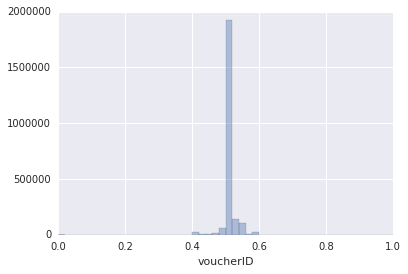

In [17]:
%matplotlib inline
import seaborn as sns

sns.distplot(data_prob['voucherID'], kde=False)

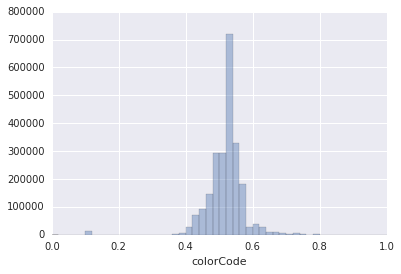

In [42]:
%matplotlib inline
import seaborn as sns

sns.distplot(data_prob['colorCode'], bins=50, kde=False);
#sns.distplot(data_prob['colorCode'], bins=40, kde=False)

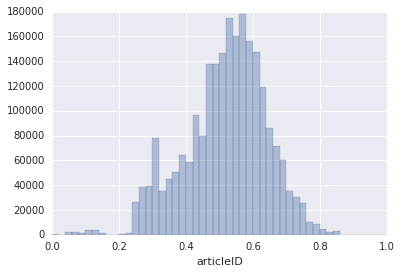

In [21]:
%matplotlib inline
import seaborn as sns

sns.distplot(data_prob['articleID'], kde=False);

/usr/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


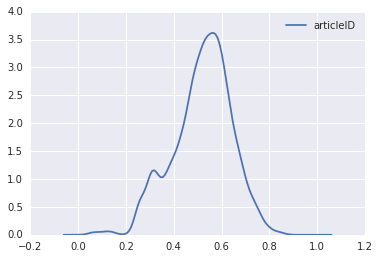

In [28]:
%matplotlib inline
import seaborn as sns

sns.kdeplot(data_prob['articleID'], bw=.02);

In [16]:
data_prob[ ['articleID', 'colorCode', 'sizeCode', 
                                                           'productGroup', 'quantity', 'price',
                                                           'rrp','voucherID',
                                                           'voucherAmount','customerID','paymentMethod']]

,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,paymentMethod
0,0.400000,0.515112,0.512356,0.461399,1,10.00,29.99,0.519868,0.0,c1010575,0.555840
1,0.463519,0.487375,0.512356,0.461399,1,20.00,39.99,0.519868,0.0,c1010575,0.555840
2,0.640599,0.447977,0.530262,0.582717,1,35.00,49.99,0.519868,0.0,c1045905,0.555840
3,0.669611,0.473667,0.530262,0.582717,1,49.99,49.99,0.519868,0.0,c1045905,0.555840
4,0.589744,0.586667,0.521923,0.582717,1,10.00,35.99,0.519868,0.0,c1089295,0.385352
5,0.589744,0.515112,0.521923,0.582717,1,10.00,35.99,0.519868,0.0,c1089295,0.385352
6,0.403101,0.528560,0.521923,0.582717,1,25.00,39.99,0.519868,0.0,c1089295,0.385352
7,0.543478,0.404970,0.512356,0.582717,1,15.00,39.99,0.519868,0.0,c1089295,0.385352
8,0.673077,0.490901,0.521923,0.676833,0,0.00,59.99,0.519868,0.0,c1089295,0.385352
9,0.502030,0.528560,0.521923,0.615971,1,89.99,89.99,0.519868,0.0,c1050116,0.555840


In [4]:
xTrain, yTrain, xTest, yTest = DatasetManipulator.getTrainAndTestData(data_prob, 
                                                           ['articleID', 'colorCode', 'sizeCode', 
                                                           'productGroup', 'quantity', 'price',
                                                           'rrp','voucherID', 'orderDate',
                                                           'voucherAmount','customerID','paymentMethod'], False, False)

Performing feature engineering...

Kept columns Index(['colorCode', 'sizeCode', 'productGroup', 'quantity', 'price', 'rrp',
       'voucherID', 'voucherAmount', 'paymentMethod', 'returnQuantity',
       'overpriced', 'discountedAmount', 'percentageReturned',
       'itemPercentageReturned', 'orderDate-month', 'orderDate-day'],
      dtype='object')


In [5]:
xTrain

array([[0.470873786407767, 0.4734734734734735, 0.5219227756812564, ...,
        0.0, 'c1218462', 0.5558403258277735],
       [0.7091172214182344, 0.4909008703515316, 0.5219227756812564, ...,
        0.0, 'c1098992', 0.5558403258277735],
       [0.4848484848484849, 0.4500636710933236, 0.5502096172531646, ...,
        0.0, 'c1045861', 0.5558403258277735],
       ..., 
       [0.3023658395845355, 0.4555103884372177, 0.5392846314824263, ...,
        10.0, 'c1194395', 0.38535225934713535],
       [0.6314031180400891, 0.5239801402467114, 0.6035454396235707, ...,
        10.0, 'c1298911', 0.5558403258277735],
       [0.3696537678207739, 0.5150273224043715, 0.5219227756812564, ...,
        10.0, 'c1027065', 0.5558403258277735]], dtype=object)

In [5]:
model = ClassifierTrainer.trainClassifier(xTrain, yTrain)

Training classifier...
      Iter       Train Loss   Remaining Time 
         1           1.3229           33.54m
         2           1.2720           25.10m
         3           1.2284           20.24m
         4           1.1922           17.70m
         5           1.1605           16.01m
         6           1.1332           14.76m
         7           1.1105           13.89m
         8           1.0900           13.15m
         9           1.0728           12.53m
        10           1.0572           12.01m
        20           0.9747            8.92m
        30           0.9466            7.56m
        40           0.9337            6.22m
        50           0.9264            5.03m
        60           0.9228            3.95m
        70           0.9204            2.89m
        80           0.9188            1.91m
        90           0.9177           56.83s
       100           0.9168            0.00s


In [8]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(verbose=1, max_depth=10, learning_rate=0.1)
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)
Validator.performValidation(yPred, yTest)

      Iter       Train Loss   Remaining Time 
         1           1.3131          207.39m
         2           1.2545          201.35m
         3           1.2061          200.91m
         4           1.1655          198.17m
         5           1.1313          196.74m
         6           1.1022          195.25m
         7           1.0773          193.45m
         8           1.0559          192.46m
         9           1.0375          191.49m
        10           1.0216          189.72m
        20           0.9396          175.13m
        30           0.9141          156.72m
        40           0.9039          134.42m
        50           0.8988          110.31m
        60           0.8955           86.04m
        70           0.8931           62.24m
        80           0.8909           40.30m
        90           0.8888           19.76m
       100           0.8870            0.00s
             precision    recall  f1-score   support

          0       0.70      0.78      0.74   

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(verbose=1, max_depth=6, learning_rate=0.1)
model.fit(xTrain, yTrain)

NameError: name 'xTrain' is not defined

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(verbose=1, max_depth=8, learning_rate=0.1)
model.fit(xTrain, yTrain)

      Iter       Train Loss   Remaining Time 
         1           1.3138           58.04m
         2           1.2558           58.74m
         3           1.2077           57.05m
         4           1.1675           61.17m
         5           1.1336           62.32m
         6           1.1048           63.01m
         7           1.0801           63.50m
         8           1.0590           63.74m
         9           1.0409           63.76m
        10           1.0251           63.48m
        20           0.9449           59.77m
        30           0.9215           51.95m
        40           0.9132           43.94m
        50           0.9097           35.90m
        60           0.9079           28.76m
        70           0.9066           21.28m
        80           0.9055           13.78m
        90           0.9047            6.69m
       100           0.9037            0.00s


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=8, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=1,
              warm_start=False)

In [10]:
model = GradientBoostingClassifier(verbose=1, max_leaf_nodes=32, learning_rate=0.07, n_estimators=200)
model.fit(xTrain, yTrain)

      Iter       Train Loss   Remaining Time 
         1           1.3379           19.44m
         2           1.2971           19.51m
         3           1.2613           19.63m
         4           1.2296           19.72m
         5           1.2010           20.04m
         6           1.1754           20.01m
         7           1.1527           19.93m
         8           1.1322           19.79m
         9           1.1140           19.92m
        10           1.0974           19.82m
        20           0.9971           18.88m
        30           0.9565           17.79m
        40           0.9381           16.57m
        50           0.9291           15.56m
        60           0.9242           14.51m
        70           0.9209           13.29m
        80           0.9189           12.16m
        90           0.9175           11.10m
       100           0.9164           10.06m
       200           0.9127            0.00s


GradientBoostingClassifier(init=None, learning_rate=0.07, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=32,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=1,
              warm_start=False)

In [11]:
model

GradientBoostingClassifier(init=None, learning_rate=0.07, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=32,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=1,
              warm_start=False)

In [6]:
from zaCode import Validator

yPred = model.predict(xTest)
Validator.performValidation(yPred, yTest)

             precision    recall  f1-score   support

          0       0.69      0.79      0.74    243624
          1       0.83      0.74      0.78    337579

avg / total       0.77      0.76      0.76    581203

Number Over 86874
Number Under 51512
Number Equal 442817
138386


In [2]:
data_prob = pd.read_csv('../data/orders_train_condproba.csv')
data_prob = data_prob.drop('Unnamed: 0', 1)